In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

ModuleNotFoundError: No module named 'folium'

In [2]:
!pip install folium


     |████████████████████████████████| 102kB 10.2MB/s ta 0:00:01


In [3]:
!pip install beautifulsoup4


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

resp = requests.get(url)
toronto_html = BeautifulSoup(resp.content)

In [6]:
soup = BeautifulSoup(str(toronto_html))

In [7]:
neighborhood_table = soup.find('table')

In [8]:
table_str = str(neighborhood_table.extract())

In [9]:
toronto_df = pd.read_html(table_str)[0]

In [10]:
toronto_df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
toronto_df.columns = ['PostalCode'] + list(toronto_df.columns)[1:]

In [12]:
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [13]:
toronto_df.shape

(180, 3)

In [14]:
toronto_df.Borough.value_counts()


Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [15]:
borough_na = toronto_df[toronto_df.Borough == 'Not assigned']
toronto_df.drop(borough_na.index, inplace=True)

In [16]:
toronto_df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [17]:
toronto_df.shape


(103, 3)

In [18]:
toronto_df = toronto_df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(lambda x: ', '.join(x)).to_frame()


In [19]:
toronto_df.reset_index(inplace=True)
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [20]:
toronto_df[toronto_df.Neighborhood == "Not assigned"]


,PostalCode,Borough,Neighborhood


In [21]:
toronto_df.loc[85, 'Neighborhood'] = toronto_df.loc[85, 'Borough']
toronto_df[toronto_df.Neighborhood == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [22]:
toronto_df.head()


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [23]:
toronto_df.shape


(103, 3)

In [24]:
geo_url = "https://cocl.us/Geospatial_data"

geocode_df = pd.read_csv(geo_url)
geocode_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geocode_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
toronto_df = pd.merge(toronto_df, geocode_df, on='PostalCode')
toronto_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [26]:
toronto_latlong = [43.653225, -79.383186]


In [27]:
# create map of Manhattan using latitude and longitude values
toronto_map = folium.Map(location=toronto_latlong, zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#2E7D32',
        fill=True,
        fill_color='#FFEB3B',
        fill_opacity=0.75,
        parse_html=False).add_to(toronto_map)

In [29]:
search_url = 'https://api.foursquare.com/v2/venues/search'

In [32]:
CLIENT_ID = 'LXATLXQ3BHXZMXWST4QD1TS3YZEHM4HNOWDDDE2UUASSHQPA' # your Foursquare ID
CLIENT_SECRET = '0TFIUVQSIUD1Q0XVT5UIOUFOBEQEOWT4OOSUMPECPWL0RCB2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LXATLXQ3BHXZMXWST4QD1TS3YZEHM4HNOWDDDE2UUASSHQPA
CLIENT_SECRET:0TFIUVQSIUD1Q0XVT5UIOUFOBEQEOWT4OOSUMPECPWL0RCB2


In [33]:
toronto_df.loc[0, 'Borough']

'Scarborough'

In [34]:
print('Latitude and longitude values of {} are {}, {}.'.format(toronto_df.loc[0, 'Borough'], 
                                                               toronto_df.loc[0, 'Latitude'], 
                                                               toronto_df.loc[0, 'Longitude']))

Latitude and longitude values of Scarborough are 43.806686299999996, -79.19435340000001.


In [35]:
params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v=VERSION,
  ll=f"{toronto_df.loc[0, 'Latitude']}, {toronto_df.loc[0, 'Longitude']}",
  radius=500,
  limit=100
)

In [36]:
resp = requests.get(url=search_url, params=params)
data = resp.json()

In [37]:
data['response']['venues'][0]

{'id': '4e389459b61c438b547e8ed4',
 'name': 'Rouge Park - Woodland Trail',
 'location': {'lat': 43.80178186082014,
  'lng': -79.20042735921538,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.80178186082014,
    'lng': -79.20042735921538}],
  'distance': 732,
  'cc': 'CA',
  'country': 'Canada',
  'formattedAddress': ['Canada']},
 'categories': [{'id': '4bf58dd8d48988d159941735',
   'name': 'Trail',
   'pluralName': 'Trails',
   'shortName': 'Trail',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1590051622',
 'hasPerk': False}

In [38]:
def get_venues(neighborhood, lat, long, limit=100, radius=250):
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{lat}, {long}",
        radius=radius,
        limit=limit
    )
    venues = []
    data = requests.get(url=search_url, params=params).json()
    for v in data['response']['venues']:
        venues.append([neighborhood, lat, long, v['name'], v['location']['lat'], v['location']['lng'], 
                       ', '.join(x['name'] for x in v['categories'])])
    return venues

In [39]:
nbr_venues_df = pd.DataFrame()
columns=['Neighborhood', 'NeighborhoodLat', 'NeighborhoodLong', 'VenueName', 'VenueLat', 'VenueLong', 'VenueCategory']

In [40]:
for name, lat, long in zip(toronto_df.Neighborhood, toronto_df.Latitude, toronto_df.Longitude):
    nbr_venues_df = nbr_venues_df.append(get_venues(name, lat, long))

In [41]:
nbr_venues_df.columns = columns

In [42]:
nbr_venues_df.head()

,Neighborhood,NeighborhoodLat,NeighborhoodLong,VenueName,VenueLat,VenueLong,VenueCategory
0,"Malvern, Rouge",43.806686,-79.194353,Rouge Park - Woodland Trail,43.801782,-79.200427,Trail
1,"Malvern, Rouge",43.806686,-79.194353,Alvin Curling Public School,43.808683,-79.190103,Elementary School
2,"Malvern, Rouge",43.806686,-79.194353,Shell,43.803227,-79.192414,Gas Station
3,"Malvern, Rouge",43.806686,-79.194353,Kaycan - SCARBOROUGH,43.806768,-79.197875,Building
4,"Malvern, Rouge",43.806686,-79.194353,T Hamilton & Son Roofing Inc,43.807985,-79.198194,Construction & Landscaping


In [43]:
nbr_venues_df.shape


(9867, 7)

In [44]:
nbr_venues_df.to_csv('toronto_boroughs_and_venues.csv')

In [45]:
nbr_venues_df = pd.read_csv('toronto_boroughs_and_venues.csv')
nbr_venues_df.drop(['Unnamed: 0'], axis=1, inplace=True)
nbr_venues_df.head()

,Neighborhood,NeighborhoodLat,NeighborhoodLong,VenueName,VenueLat,VenueLong,VenueCategory
0,"Malvern, Rouge",43.806686,-79.194353,Rouge Park - Woodland Trail,43.801782,-79.200427,Trail
1,"Malvern, Rouge",43.806686,-79.194353,Alvin Curling Public School,43.808683,-79.190103,Elementary School
2,"Malvern, Rouge",43.806686,-79.194353,Shell,43.803227,-79.192414,Gas Station
3,"Malvern, Rouge",43.806686,-79.194353,Kaycan - SCARBOROUGH,43.806768,-79.197875,Building
4,"Malvern, Rouge",43.806686,-79.194353,T Hamilton & Son Roofing Inc,43.807985,-79.198194,Construction & Landscaping


In [46]:
nbr_venues_df.VenueCategory.replace('', np.nan, inplace=True)
nbr_venues_df.dropna(inplace=True)
nbr_venues_df.shape

(8775, 7)

In [47]:
nbr_venues_df.VenueCategory.value_counts()


Office                                      482
Residential Building (Apartment / Condo)    365
Building                                    262
Park                                        188
Salon / Barbershop                          185
Automotive Shop                             165
Coffee Shop                                 164
Church                                      161
Medical Center                              145
Doctor's Office                             139
Bank                                        130
Convenience Store                           123
Dentist's Office                            120
Pizza Place                                 114
Café                                        102
School                                       95
Bus Line                                     93
Pharmacy                                     87
Gas Station                                  84
Furniture / Home Store                       80
Bakery                                  

In [48]:
# Dropping rows i.e categories which are mentioned less than 15 times in the dataset
common_categories = nbr_venues_df.VenueCategory.unique()[nbr_venues_df.VenueCategory.value_counts()>15]

In [49]:
nbr_venues_df = nbr_venues_df[nbr_venues_df.VenueCategory.isin(common_categories)]
nbr_venues_df.shape

(6362, 7)

In [50]:
from IPython.core.display import HTML

display(HTML(nbr_venues_df.groupby('Neighborhood').count().to_html()))

,NeighborhoodLat,NeighborhoodLong,VenueName,VenueLat,VenueLong,VenueCategory
Neighborhood,,,,,,
Agincourt,73,73,73,73,73,73
"Alderwood, Long Branch",67,67,67,67,67,67
"Bathurst Manor, Wilson Heights, Downsview North",66,66,66,66,66,66
Bayview Village,74,74,74,74,74,74
"Bedford Park, Lawrence Manor East",61,61,61,61,61,61
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",63,63,63,63,63,63
"Brockton, Parkdale Village, Exhibition Place",75,75,75,75,75,75
Business reply mail Processing Centre,46,46,46,46,46,46


In [51]:
nbr_venues_df.groupby('Neighborhood').count().VenueCategory.min()


13

In [52]:
# add neighborhood column back to dataframe
category_onehot = pd.get_dummies(nbr_venues_df.VenueCategory)
category_onehot['Neighborhood'] = nbr_venues_df.Neighborhood

# move neighborhood column to the first column
fixed_columns = [category_onehot.columns[-1]] + list(category_onehot.columns[:-1])
category_onehot = category_onehot[fixed_columns]

In [53]:
category_onehot.head()


,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Church,Clothing Store,Club House,Coffee Shop,College Academic Building,College Gym,College Lab,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Dentist's Office,Department Store,Design Studio,Doctor's Office,Dog Run,Driving School,Electronics Store,Elementary School,Event Space,Factory,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,Funeral Home,Furniture / Home Store,Gas Station,General Entertainment,General Travel,German Restaurant,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Health & Beauty Service,High School,Hindu Temple,Hobby Shop,Hookah Bar,Hotel,Housing Development,Indian Restaurant,Internet Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laundry Service,Lounge,Martial Arts Dojo,Medical Center,Meeting Room,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Professional & Other Places,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Shawarma Place,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spiritual Center,Storage Facility,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Temple,Thai Restaurant,Theme Park,Thrift / Vintage Store,Trail,Winery,Zoo Exhibit
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
category_onehot.shape


(6362, 131)

In [55]:
category_onehot = category_onehot.groupby('Neighborhood').mean().reset_index()
category_onehot

,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Church,Clothing Store,Club House,Coffee Shop,College Academic Building,College Gym,College Lab,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Dentist's Office,Department Store,Design Studio,Doctor's Office,Dog Run,Driving School,Electronics Store,Elementary School,Event Space,Factory,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,Funeral Home,Furniture / Home Store,Gas Station,General Entertainment,General Travel,German Restaurant,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Health & Beauty Service,High School,Hindu Temple,Hobby Shop,Hookah Bar,Hotel,Housing Development,Indian Restaurant,Internet Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laundry Service,Lounge,Martial Arts Dojo,Medical Center,Meeting Room,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Professional & Other Places,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Shawarma Place,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spiritual Center,Storage Facility,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Temple,Thai Restaurant,Theme Park,Thrift / Vintage Store,Trail,Winery,Zoo Exhibit
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397,0.150685,0.013699,0.000000,0.000000,0.000000,0.013699,0.109589,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.027397,0.054795,0.000000,0.000000,0.041096,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.041096,0.000000,0.000000,0.000000,0.000000,0.027397,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397,0.000000,0.013699,0.000000,0.000000,0.013699,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397,0.000000,0.013699,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.041096,0.013699,0.000000,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.000000,0.014925,0.029851,0.000000,0.014925,0.014925,0.000000,0.000000,0.029851,0.000000,0.044776,0.000000,0.029851,0.014925,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,0.000000,0.014925,0.014925,0.000000,0.000000,0.029851,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000,0.000000,0.044776,0.000000,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044776,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.014925,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.014925,0.000000,0.044776,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,0.119403,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [56]:
num_top_venues = 5

for nbrhood in category_onehot['Neighborhood']:
    print("---- "+nbrhood+" ----")
    temp = category_onehot[category_onehot['Neighborhood'] == nbrhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
             venue  freq
0  Automotive Shop  0.15
1           Office  0.11
2         Building  0.11
3           Church  0.05
4  Doctor's Office  0.04


---- Alderwood, Long Branch ----
              venue  freq
0            Office  0.12
1       Gas Station  0.04
2              Bank  0.04
3    Medical Center  0.04
4  Dentist's Office  0.04


---- Bathurst Manor, Wilson Heights, Downsview North ----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.12
1                           Doctor's Office  0.11
2                            Medical Center  0.08
3                                    Office  0.06
4                                      Bank  0.06


---- Bayview Village ----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.09
1                                    Church  0.08
2                           Doctor's Office  0.07
3                        Salon / Barbershop  0.07
4

                venue  freq
0   Convenience Store  0.12
1  Salon / Barbershop  0.06
2              Office  0.06
3          Nail Salon  0.05
4          Restaurant  0.03


---- Golden Mile, Clairlea, Oakridge ----
                                      venue  freq
0                                  Bus Line  0.11
1                                      Park  0.06
2  Residential Building (Apartment / Condo)  0.05
3                           Automotive Shop  0.05
4                        Chinese Restaurant  0.03


---- Guildwood, Morningside, West Hill ----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.07
1                         Electronics Store  0.07
2                                Restaurant  0.05
3                                    Church  0.05
4                                      Bank  0.03


---- Harbourfront East, Union Station, Toronto Islands ----
                                      venue  freq
0  Residential Building (Apart

4                Building  0.05


---- Richmond, Adelaide, King ----
         venue  freq
0       Office  0.15
1     Building  0.08
2         Café  0.07
3  Coffee Shop  0.07
4        Hotel  0.03


---- Rosedale ----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.17
1                                    Office  0.13
2                                  Building  0.09
3                                      Park  0.09
4                                     Trail  0.04


---- Roselawn ----
              venue  freq
0  Dentist's Office  0.09
1        Playground  0.07
2   Doctor's Office  0.07
3            Office  0.07
4               Spa  0.06


---- Rouge Hill, Port Union, Highland Creek ----
                   venue  freq
0        Automotive Shop  0.09
1                 Office  0.06
2         Medical Center  0.05
3                   Park  0.05
4  General Entertainment  0.03


---- Runnymede, Swansea ----
                    venue  freq
0      

                                      venue  freq
0  Residential Building (Apartment / Condo)  0.33
1                                      Park  0.07
2                                       Gym  0.07
3                                    Office  0.06
4                                  Building  0.04


---- York Mills, Silver Hills ----
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.17
1                                      Park  0.13
2                               High School  0.10
3                                    Church  0.10
4                                      Pool  0.07




In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 10

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nbr_venues_sorted_df = pd.DataFrame(columns=columns)
nbr_venues_sorted_df['Neighborhood'] = category_onehot['Neighborhood']

for ind in np.arange(category_onehot.shape[0]):
    nbr_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(category_onehot.iloc[ind, :], num_top_venues)

nbr_venues_sorted_df.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Automotive Shop,Building,Office,Church,Storage Facility,Doctor's Office,Coffee Shop,Tech Startup,Factory,Sandwich Place
1,"Alderwood, Long Branch",Office,Gas Station,Dentist's Office,Medical Center,Bank,Salon / Barbershop,Asian Restaurant,Spa,Coffee Shop,Convenience Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Residential Building (Apartment / Condo),Doctor's Office,Medical Center,Office,Bank,Salon / Barbershop,Spa,Building,Dentist's Office,Convenience Store
3,Bayview Village,Residential Building (Apartment / Condo),Church,Salon / Barbershop,Doctor's Office,Office,Dog Run,Bank,Medical Center,Building,Café
4,"Bedford Park, Lawrence Manor East",Salon / Barbershop,Spa,Italian Restaurant,Restaurant,Juice Bar,Cosmetics Shop,Medical Center,Nail Salon,Hobby Shop,Coffee Shop


In [59]:
from sklearn.cluster import KMeans


In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)


In [61]:
X = category_onehot.drop(['Neighborhood'], axis=1)
X.head()

,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Breakfast Spot,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Church,Clothing Store,Club House,Coffee Shop,College Academic Building,College Gym,College Lab,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Dentist's Office,Department Store,Design Studio,Doctor's Office,Dog Run,Driving School,Electronics Store,Elementary School,Event Space,Factory,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,Funeral Home,Furniture / Home Store,Gas Station,General Entertainment,General Travel,German Restaurant,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Health & Beauty Service,High School,Hindu Temple,Hobby Shop,Hookah Bar,Hotel,Housing Development,Indian Restaurant,Internet Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laundry Service,Lounge,Martial Arts Dojo,Medical Center,Meeting Room,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Office,Optical Shop,Other Nightlife,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Professional & Other Places,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Shawarma Place,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spiritual Center,Storage Facility,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Temple,Thai Restaurant,Theme Park,Thrift / Vintage Store,Trail,Winery,Zoo Exhibit
0,0.0,0.0,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397,0.150685,0.013699,0.000000,0.000000,0.000000,0.013699,0.109589,0.0,0.000000,0.0,0.0,0.013699,0.000000,0.000000,0.027397,0.054795,0.0,0.0,0.041096,0.0,0.0,0.0,0.0,0.013699,0.0,0.000000,0.000000,0.013699,0.0,0.013699,0.041096,0.000000,0.0,0.000000,0.0,0.027397,0.027397,0.000000,0.0,0.0,0.0,0.000000,0.0,0.027397,0.000000,0.013699,0.000000,0.0,0.013699,0.0,0.013699,0.013699,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.013699,0.0,0.013699,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.109589,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.027397,0.000000,0.013699,0.000000,0.027397,0.0,0.000000,0.0,0.000000,0.000000,0.013699,0.0,0.0,0.0,0.000000,0.0,0.041096,0.013699,0.0,0.0,0.027397,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.014925,0.029851,0.000000,0.014925,0.014925,0.000000,0.000000,0.029851,0.000000,0.044776,0.000000,0.029851,0.014925,0.0,0.014925,0.0,0.0,0.000000,0.014925,0.000000,0.014925,0.014925,0.0,0.0,0.029851,0.0,0.0,0.0,0.0,0.029851,0.0,0.000000,0.000000,0.044776,0.0,0.014925,0.014925,0.000000,0.0,0.000000,0.0,0.000000,0.029851,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.044776,0.014925,0.000000,0.0,0.000000,0.0,0.000000,0.014925,0.014925,0.0,0.014925,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.014925,0.014925,0.0,0.044776,0.0,0.0,0.000000,0.014925,0.000000,0.0,0.000000,0.014925,0.119403,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.014925,0.014925,0.029851,0.014925,0.000000,0.014925,0.000000,0.014925,0.014925,0.044776,0.000000,0.0,0.014925,0.0,0.000000,0.000000,0.014925,0.0,0.0,0.0,0.029851,0.0,0.000000,0.000000,0.0,0.0,0.014925,0.0,0.014925,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,0.015152,0.000000,0.030303,0.0,0.015152,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.

In [63]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int32)

In [64]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [65]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

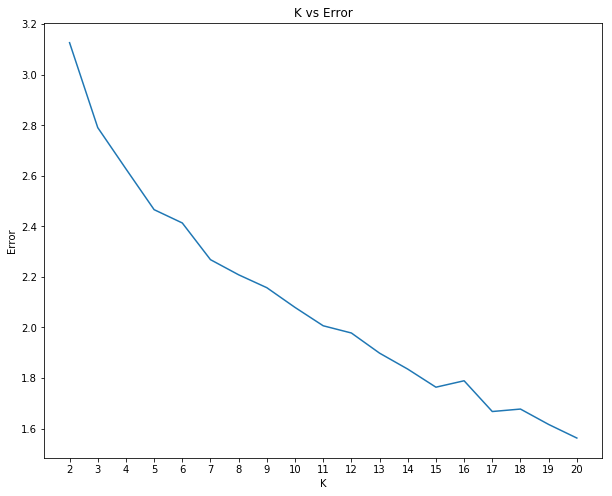

In [66]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [67]:
# train final model with k=9
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
kmeans.labels_[:10]


array([4, 8, 0, 0, 8, 1, 3, 1, 8, 7], dtype=int32)

In [69]:
# add clustering labels
nbr_venues_sorted_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [70]:
toronto_nbr_df = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_nbr_df = toronto_nbr_df.join(nbr_venues_sorted_df.set_index('Neighborhood'), on='Neighborhood')

toronto_nbr_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,8,Office,Automotive Shop,Factory,Dentist's Office,Medical Center,Coffee Shop,Building,Doctor's Office,Pharmacy,Pet Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,8,Automotive Shop,Office,Medical Center,Park,Salon / Barbershop,General Entertainment,Bar,Dentist's Office,Italian Restaurant,Laundry Service
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Electronics Store,Residential Building (Apartment / Condo),Restaurant,Church,Medical Center,Bus Stop,Salon / Barbershop,Building,School,Bank
3,M1G,Scarborough,Woburn,43.770992,-79.216917,8,Cosmetics Shop,Convenience Store,Residential Building (Apartment / Condo),Coffee Shop,Pharmacy,Pizza Place,Bus Line,Salon / Barbershop,Building,Indian Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,8,Medical Center,Doctor's Office,Building,Bakery,Automotive Shop,Office,Residential Building (Apartment / Condo),Pool,Skating Rink,Caribbean Restaurant


In [71]:
# create map
map_clusters = folium.Map(location=toronto_latlong, zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_nbr_df['Latitude'], toronto_nbr_df['Longitude'], toronto_nbr_df['Neighborhood'], toronto_nbr_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [72]:
HTML(map_clusters._repr_html_())
